In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("apple_sales_2024.csv")
print(df.head())

       State         Region  iPhone Sales (in million units)  \
0  Chongqing  Greater China                             7.46   
1    Germany         Europe                             8.63   
2         UK         Europe                             5.61   
3   Shanghai  Greater China                             7.82   
4   Thailand   Rest of Asia                            16.70   

   iPad Sales (in million units)  Mac Sales (in million units)  \
0                           6.75                          1.19   
1                          14.06                          7.03   
2                          14.09                          8.78   
3                           7.97                          9.78   
4                           8.13                          6.46   

   Wearables (in million units)  Services Revenue (in billion $)  
0                          5.88                            15.88  
1                          7.42                            10.12  
2                

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB
None


In [19]:
print(df.isnull().sum())

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64


In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df.describe())

       iPhone Sales (in million units)  iPad Sales (in million units)  \
count                      1000.000000                    1000.000000   
mean                         17.444500                       8.565880   
std                           7.180077                       3.735994   
min                           5.030000                       2.020000   
25%                          11.447500                       5.432500   
50%                          17.130000                       8.695000   
75%                          23.715000                      11.740000   
max                          29.940000                      14.990000   

       Mac Sales (in million units)  Wearables (in million units)  \
count                   1000.000000                   1000.000000   
mean                       5.555760                      6.935500   
std                        2.506491                      2.951677   
min                        1.010000                      2.000000 

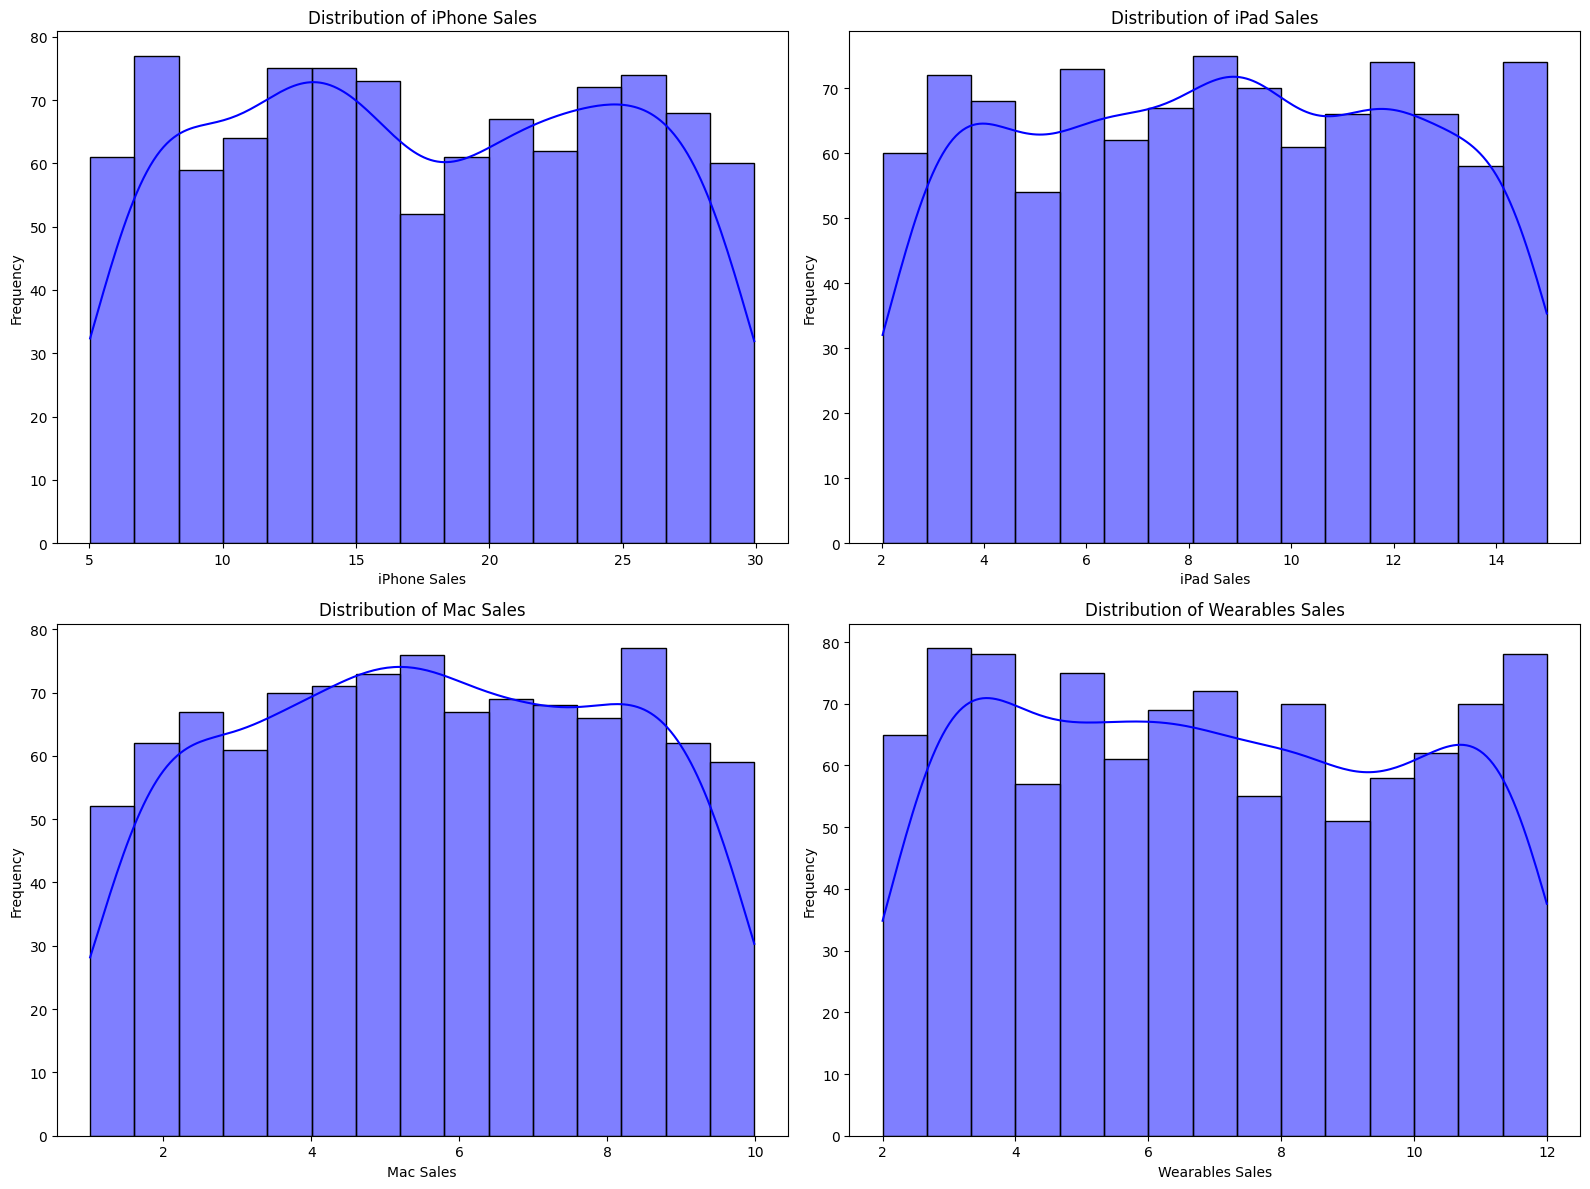

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
columns = [
    "iPhone Sales (in million units)",
    "iPad Sales (in million units)",
    "Mac Sales (in million units)",
    "Wearables (in million units)",
]
titles = ["iPhone Sales", "iPad Sales", "Mac Sales", "Wearables Sales"]

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]], kde=True, ax=ax, color='blue', bins=15)
    ax.set_title(f"Distribution of {titles[i]}")
    ax.set_xlabel(titles[i])
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [12]:
region_sales = df.groupby("Region").sum(numeric_only=True).reset_index()

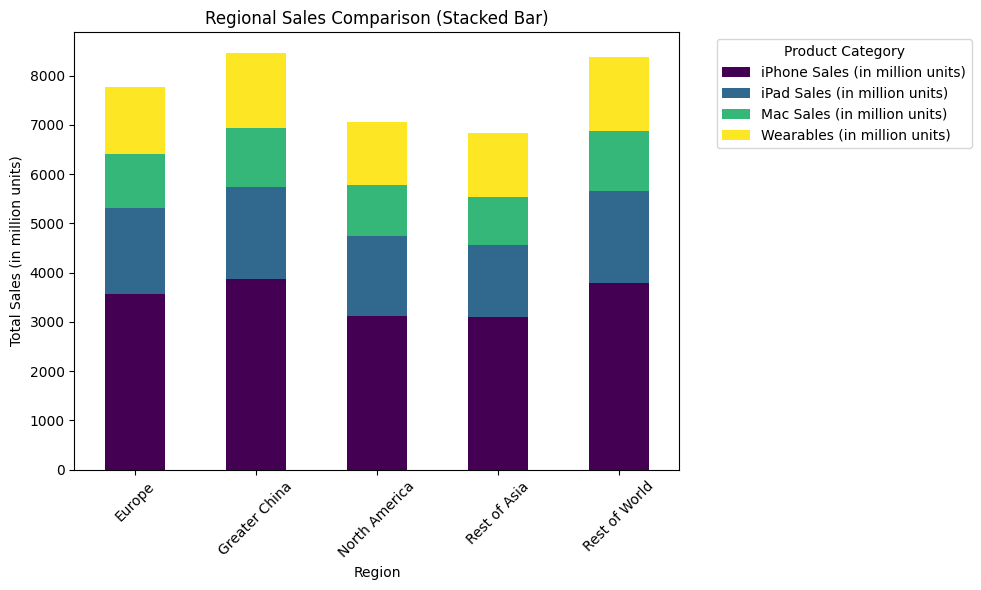

In [13]:

fig, ax = plt.subplots(figsize=(10, 6))
region_sales.set_index("Region")[columns].plot(kind="bar", stacked=True, ax=ax, cmap="viridis")
ax.set_title("Regional Sales Comparison (Stacked Bar)")
ax.set_xlabel("Region")
ax.set_ylabel("Total Sales (in million units)")
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

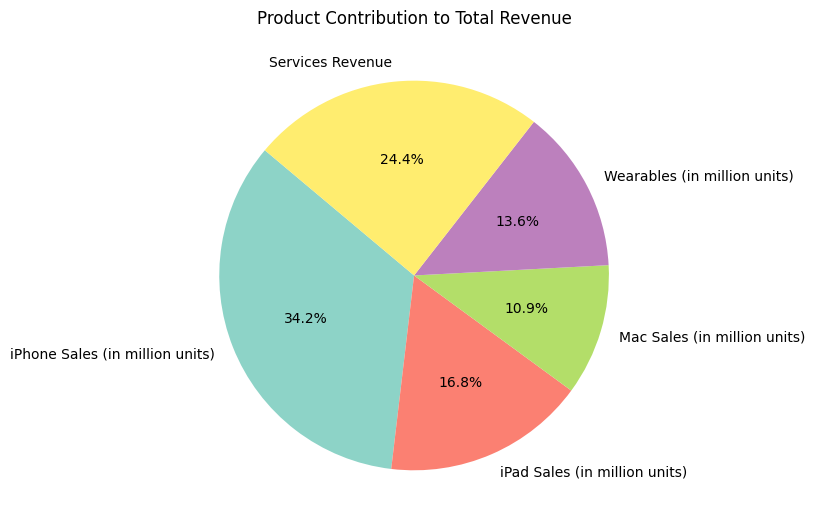

In [26]:
total_revenue = df[columns].sum().sum() + df["Services Revenue (in billion $)"].sum()
product_revenue = df[columns].sum()
product_revenue["Services Revenue"] = df["Services Revenue (in billion $)"].sum()
product_percentage = (product_revenue / total_revenue) * 100

fig, ax = plt.subplots(figsize=(8, 8))
product_revenue.plot(kind="pie", autopct="%.1f%%", startangle=140, ax=ax, cmap="Set3", ylabel="")
ax.set_title("Product Contribution to Total Revenue")
plt.tight_layout()
plt.show()

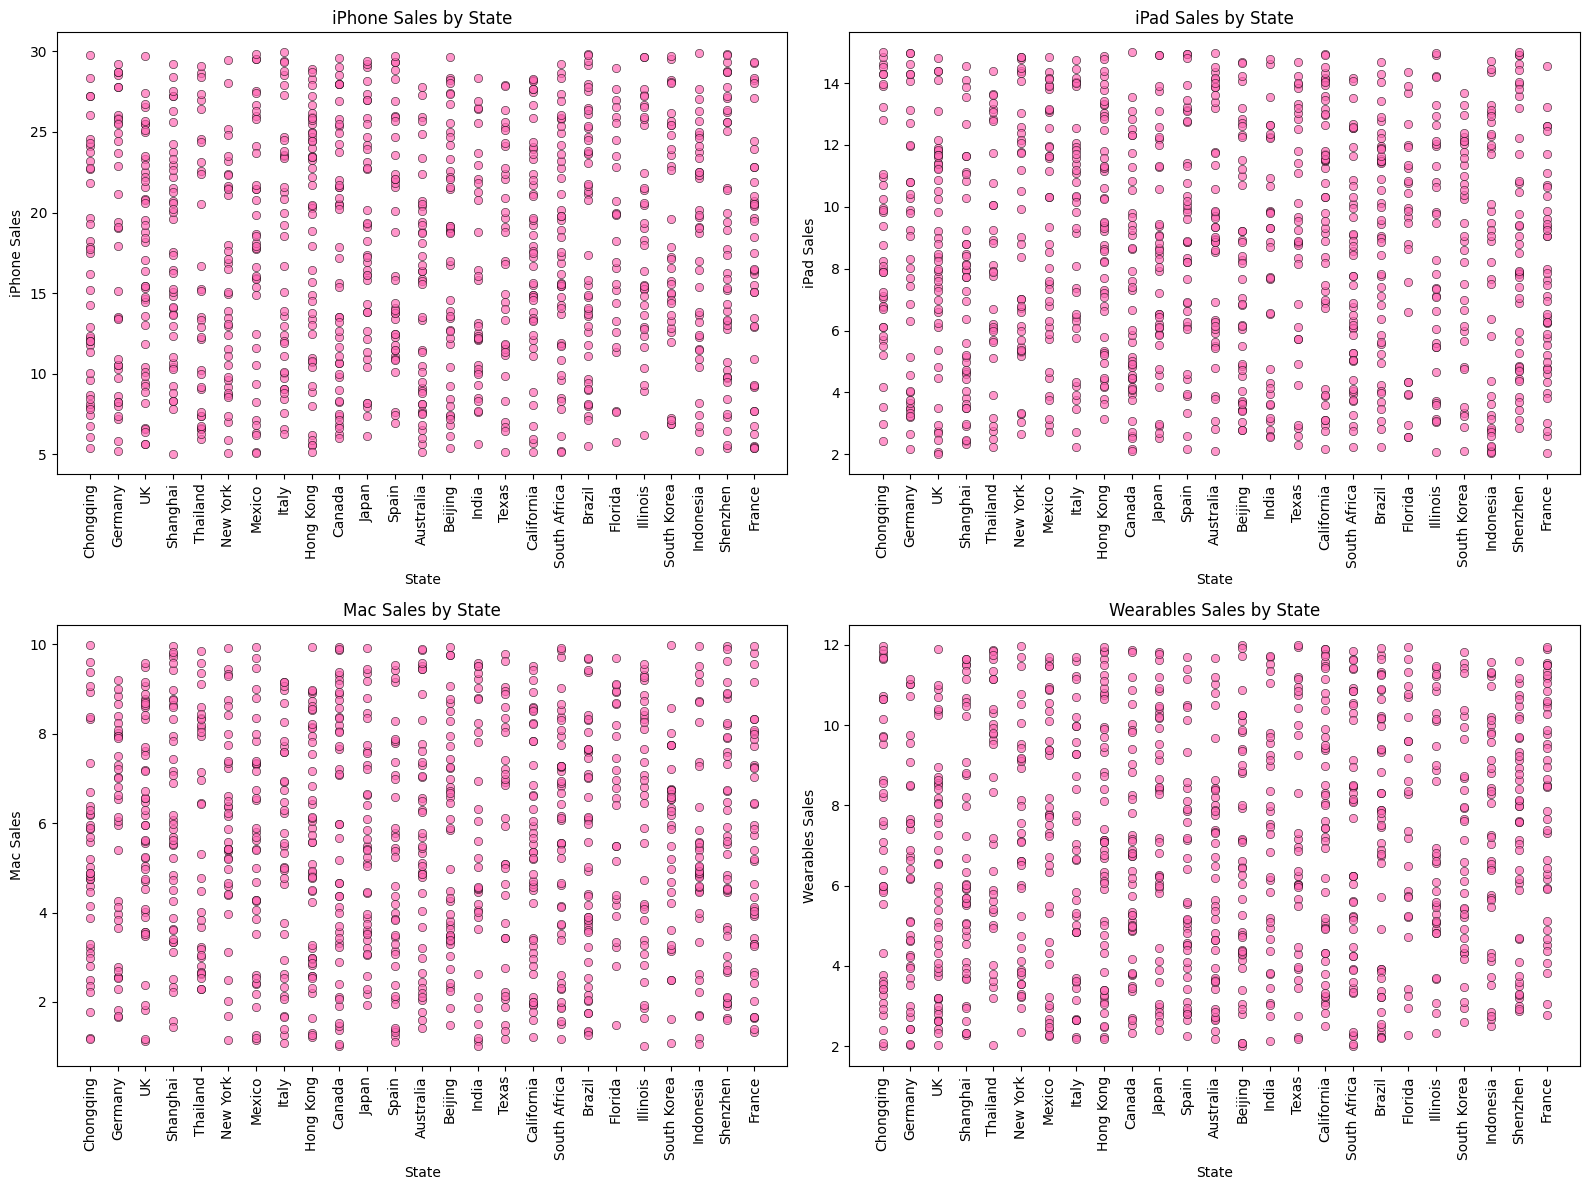

In [25]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, ax in enumerate(axes.flatten()):
    sns.scatterplot(
        x="State", 
        y=columns[i],
        data=df, 
        ax=ax,
        color="hotpink",
        alpha=0.7,
        edgecolor="black"
    )
    ax.set_title(f"{titles[i]} by State")
    ax.set_xlabel("State")
    ax.set_ylabel(titles[i])
    ax.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()


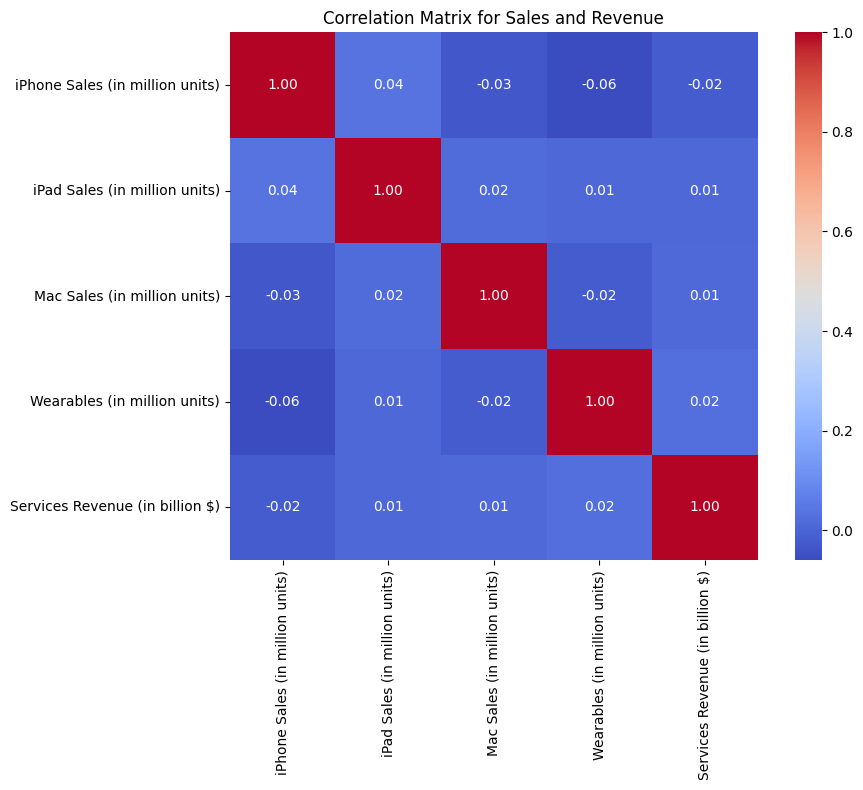

In [28]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix for Sales and Revenue")
plt.tight_layout()
plt.show()

In [29]:
print("\nKey Insights:")
print("- iPhone sales are the highest contributor to revenue.")
print("- Region-wise, some areas dominate sales in all product categories.")
print("- There is a strong correlation between iPhone sales and services revenue.")
print("- Outliers in sales can indicate specific regions or states needing further analysis.")


Key Insights:
- iPhone sales are the highest contributor to revenue.
- Region-wise, some areas dominate sales in all product categories.
- There is a strong correlation between iPhone sales and services revenue.
- Outliers in sales can indicate specific regions or states needing further analysis.
